In [1]:
from enum import Enum
class NodeType(Enum):
    FILE = 'File'
    ADD = 'Add'
    MASK = 'Mask'
    FIT = 'Fit'
    DISPLAY = 'Display'

In [3]:
print(NodeType.FILE)

NodeType.FILE


In [4]:
NodeType.FILE.value

'File'

In [5]:
nodes = {
    NodeType.ADD: { 'input': 'test' }
}

In [6]:
nodes

{<NodeType.ADD: 'Add'>: {'input': 'test'}}

In [7]:
nodes[NodeType.ADD]

{'input': 'test'}

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

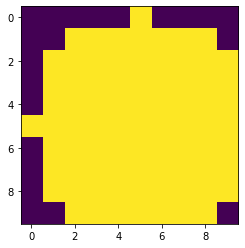

In [13]:
a = create_circular_mask(10, 10) 
plt.imshow(a)

In [11]:
h, w = 10, 10
center = (int(w/2), int(h/2))
Y, X = np.ogrid[:h, :w]
b = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

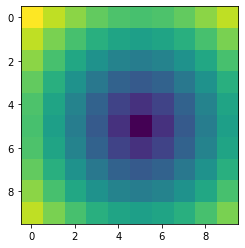

In [12]:
plt.imshow(b)

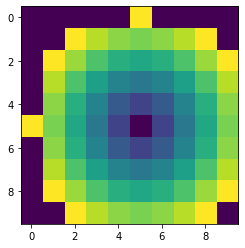

In [17]:
plt.imshow(a * b)

In [7]:
from pydantic.dataclasses import dataclass
from pydantic import BaseModel
from typing import List, Callable

class NodeProps(BaseModel):
    type: str
    input: List[str] = []
    output: List[str] = []
    options: List[str] = []
    fn: Callable = lambda x:x

In [8]:
a = NodeProps(type='test',input=['a'],output=['b'],options=[],fn=lambda x:x)



In [9]:
props = { 'type':'test', 'output':['b'], 'options':[], 'x':3 }
b = NodeProps(**props)

In [10]:
b

NodeProps(type='test', input=[], output=['b'], options=[], fn=<function NodeProps.<lambda> at 0x7fa56036f790>)

In [11]:
b.x

AttributeError: 'NodeProps' object has no attribute 'x'

In [14]:
import numpy as np

x = np.array([[1,2],[3,4]])
x = np.reshape(x, (1,2,2))
x2 = np.repeat(x, 3, axis=0)
x2

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])